<a href="https://colab.research.google.com/github/sikoh/DS-Linear-Algebra/blob/main/Bias-Variance/DS_BiasVariance_Lecture_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bias and Variance

## Overview
> * Objective 01 - Understand the Metrics used in model evaluation
> * Objective 02 - Define and determine variance
> * Objective 03 - Differentiate overfit vs underfit models
> * Objective 04 - Consider the bias/variance tradeoff in linear regression

Throughout this week, we've learned:
- How to use OLS to fit a model
- How to determine the correlation between independent features.

One thing we haven't discussed is how to measure the performance of a regression model.
- The assumptions of a linear regression models and how to assess their validity.
- What makes a good model?
- What makes a bad model?
- Between two models, which should we pick and why?


### The Process of Data Science

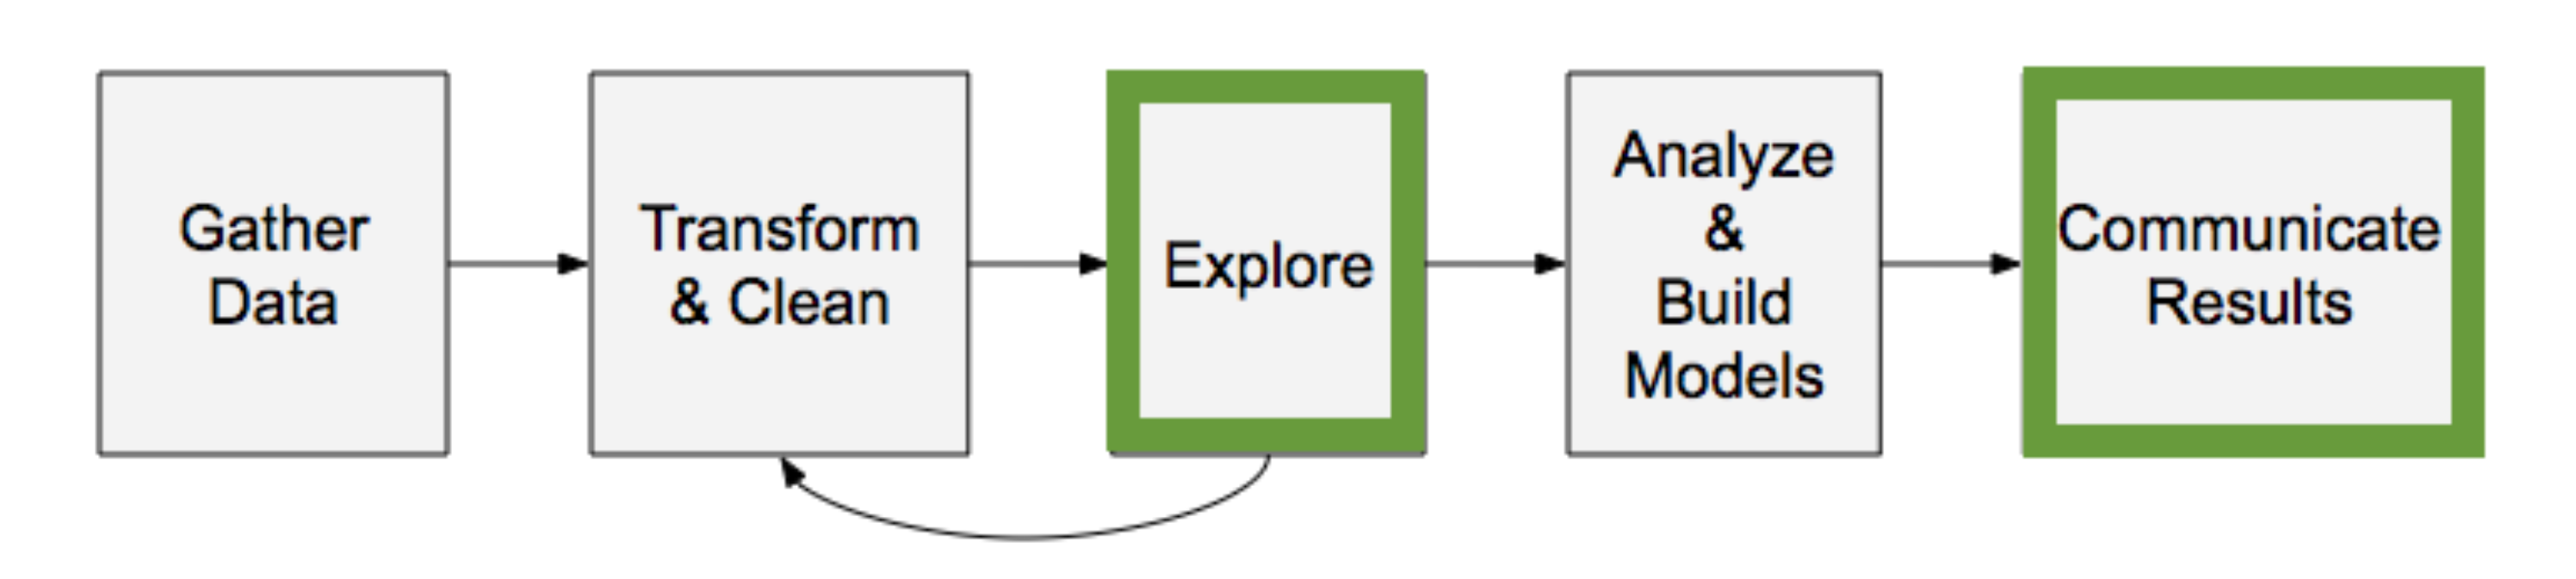

> As part of communicating results, we are also reporting our model's evaluations. In other words, once we build our models, we want to be able to [evaluate their performance](https://scikit-learn.org/stable/modules/model_evaluation.html).

## Regression Metrics

When you build a machine learning model, you are teaching a model to learn the given data and generate predictions based on the pattern observed during the learning process.

We can always choose to continue improving our model, based on the results we get. We can quantify a model's performance using metrics.


There are many different metrics we can use. The most commonly used are **MSE**, **RMSE** and **$R^2$**
- Mean Squared Error
- Root Mean Squared Error
- Median and Mean Absolute Error
- $R^2$


We use metrics to evaluate the quality of our model performance. This can get tricky when we have to maintain the flexibility of the model to account for new variables, without compromising on the correctness of the model.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from scipy import stats as st
from sklearn.linear_model import LinearRegression
from sklearn import metrics



sns.get_dataset_names()
autos = sns.load_dataset('mpg')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
autos.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
pip install missingno

In [ ]:
autos.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
import missingno as msno

In [ ]:
msno.nullity_sort(autos, sort = 'ascending')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
...,...,...,...,...,...,...,...,...,...
129,31.0,4,79.0,67.0,1950,19.0,74,japan,datsun b210
128,15.0,6,250.0,100.0,3336,17.0,74,usa,chevrolet nova
127,19.0,6,232.0,100.0,2901,16.0,74,usa,amc hornet
124,11.0,8,350.0,180.0,3664,11.0,73,usa,oldsmobile omega


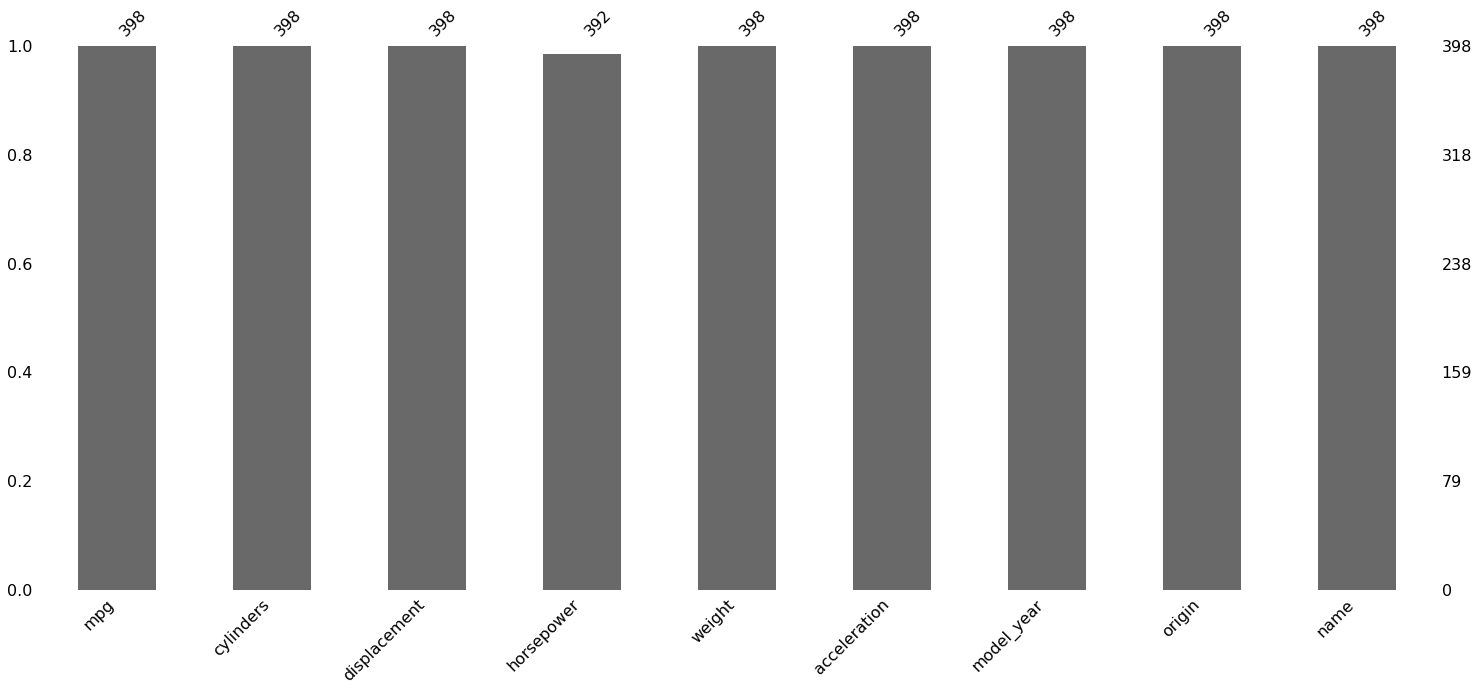

In [ ]:
msno.bar(autos)

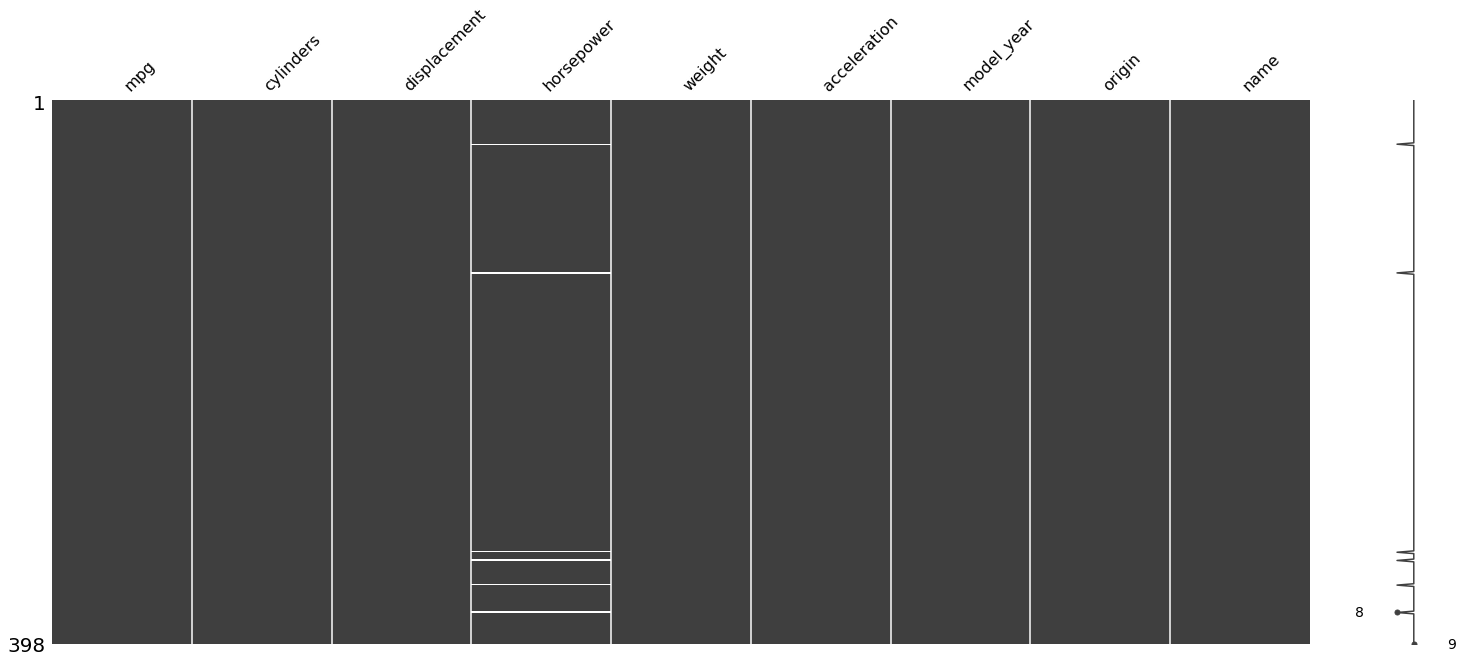

In [ ]:
msno.matrix(autos)

In [ ]:
autos.shape

(398, 9)

In [ ]:
autos.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


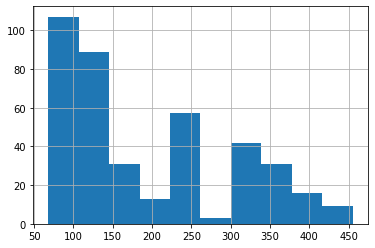

In [ ]:
autos['displacement'].hist()

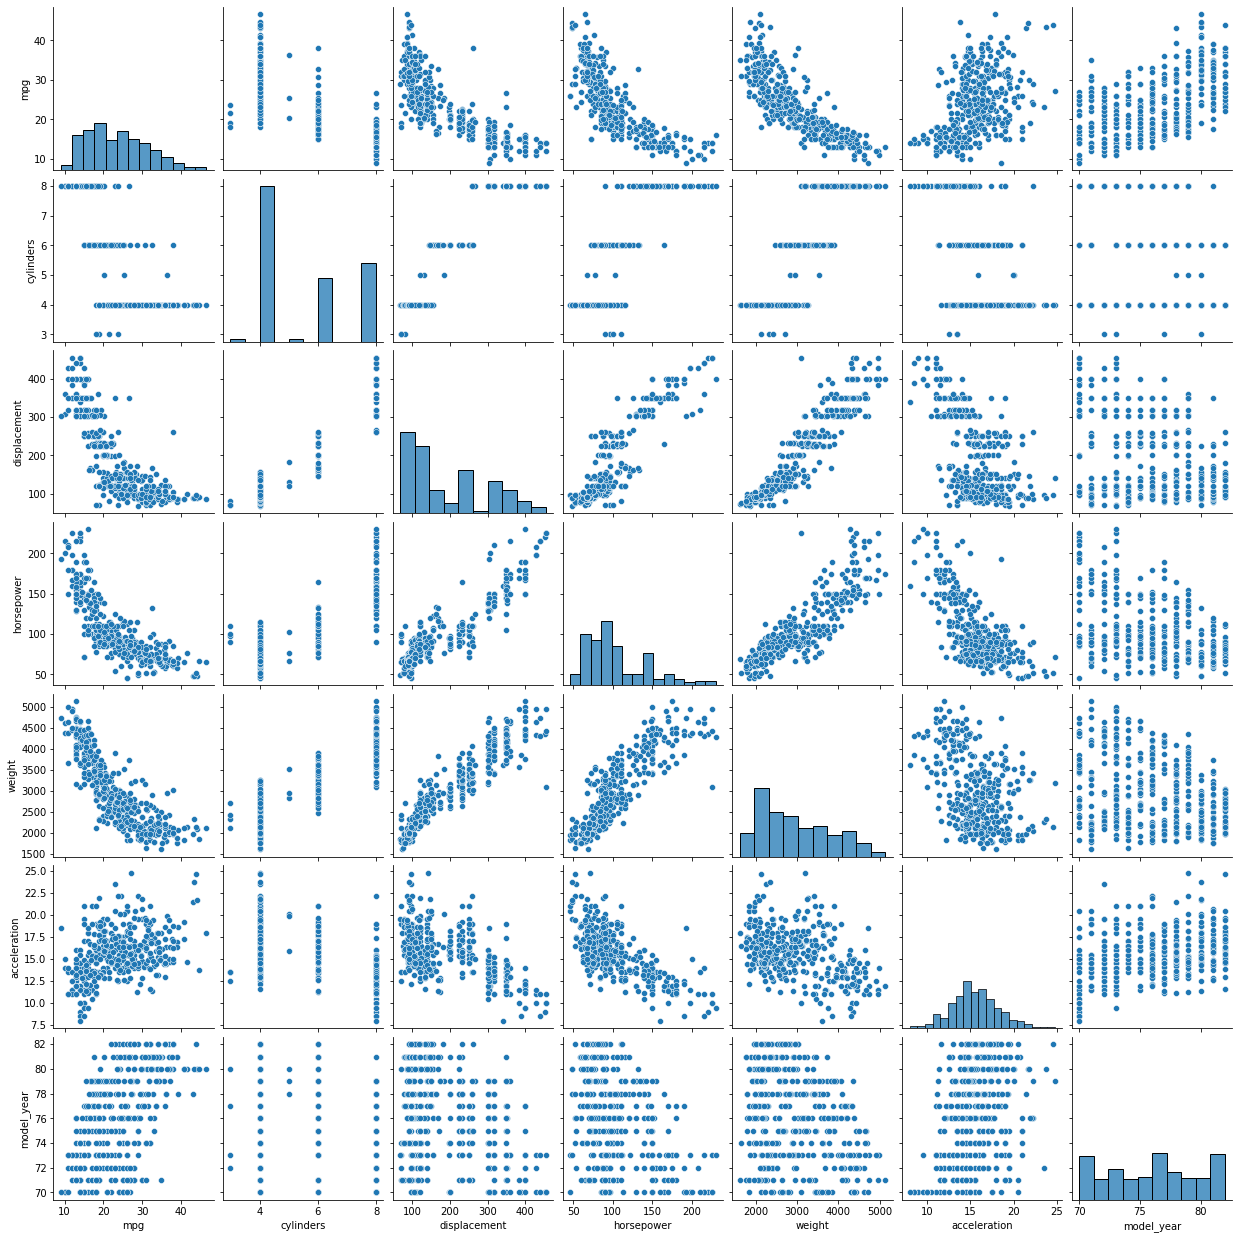

In [ ]:
#sns.pairplot(autos)

In [ ]:
autos.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
print(autos['horsepower'].mean())
autos[autos['horsepower'].isnull()]

#autos['horsepower'].fillna(104, inplace = True)
#autos.loc[32, 'horsepower'] = 100
autos.isnull().sum()

104.45226130653266


mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

###  Four Assumptions of Linear Regression
(This may come up in interviews)

1. Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.

2. Independence: The residuals are independent. In particular, there is no correlation between consecutive residuals in time series data.

3. Homoscedasticity: The residuals have constant variance at every level of x.

4. Normality: The residuals of the model are normally distributed.

5. For multiple linear regression, features must be independent of each other.

[Source](https://www.statology.org/linear-regression-assumptions/)

## Metrics

We use metrics to evaluate the quality of the our predictions produced by our models. Since our focus this week is on regression, the things we look at are:

### Residual *****


residual = true value - predicted value \
or
### $(y - \hat{y})$

#### Sum of Squared Errors

When we square the residual, we do so because no matter if the error is positive or negative, the result will always be positive.


## $SSE = \sum_{n=1}^n{(y_i - \hat{y_i})^2}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

## Total Variance


# $\sum_{n=1}^n{(y_i - \bar{y})^2}$

$y_i$ = each individual y value

$\bar{y}$ = the mean of all y values

The squared difference between actual values and the mean. Total variance is a way of saying the variance of y. Variance is a measure to describe how spread out each value is from the mean.


#### Mean Square Error

# $ MSE = \frac{1}{n}\Sigma_{i=1}^{n}{(y_i -\hat{y_i})^2}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

In [ ]:


st.pearsonr(autos['displacement'], autos['weight'])

(0.9328241468416342, 1.2222258725029702e-177)

In [ ]:
model = ols("mpg ~ weight + C(cylinders) + model_year", data=autos).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     325.6
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          1.12e-148
Time:                        17:52:40   Log-Likelihood:                -1026.1
No. Observations:                 398   AIC:                             2066.
Df Residuals:                     391   BIC:                             2094.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -20.9380      4.00

In [ ]:
autos['ypreds'] = model.predict()
autos['residuals'] = autos['mpg'] - autos['ypreds']

In [ ]:
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,ypreds,residuals
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,15.902768,2.097232
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,14.705098,0.294902
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,16.333676,1.666324
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,16.352687,-0.352687
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,16.251297,0.748703


In [ ]:
#sum of squared errors

sum(autos['residuals']**2)

4044.404964696188

In [ ]:
#calculate manually
def sum_squared_error(true, preds):
  residuals = true - preds
  return sum(residuals**2)


In [ ]:
sum_squared_error(autos['mpg'], autos['ypreds'])

4044.404964696188

In [ ]:
def mean_squared_error(true, preds):
  residuals = true - preds
  return (residuals**2).mean()

mean_squared_error(autos['mpg'], autos['ypreds'])

10.161821519337156

In [ ]:
#or use sklearn
metrics.mean_squared_error(autos['mpg'], autos['ypreds'])

10.161821519337156

Usefulness:
- Minimize value to 0
- Common metric, used in many calculations.
- Represents the average distances squared from the predicted values

Drawbacks:
- Affected by outliers
- Not part of y original units.
- Affected by the scale of y

#### Root Mean Square Error

# $ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{(y_i -\hat{y_i})^2}}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

In [ ]:
#calculate manually
def root_mean_squared_error(true, preds):
  residuals = true - preds
  mse = (residuals**2).mean()
  rmse = np.sqrt(mse)
  return rmse

print(root_mean_squared_error(autos['mpg'], autos['ypreds']))

#with numpy
np.sqrt(metrics.mean_squared_error(autos['mpg'], autos['ypreds']))

3.1877612080168674


3.1877612080168674

Usefulness:
- Minimize value to 0
- Common metric
- RMSE can be directly interpreted in terms of measurement units, and hence it is a better measure of fit than a correlation coefficient.

Drawbacks:
- Affected by outliers.
- Depends on the scale of y.

#### Mean Absolute Error (or Deviation)

# $ MAE  = \frac{\Sigma{|y_i - x_i|} }{n}$

n = number of data points

y = true values

$\hat{y}$ = predictions

In [ ]:
#manually


In [ ]:

#metrics library
print(metrics.mean_absolute_error(autos['mpg'], autos['ypreds']))
print(metrics.median_absolute_error(autos['mpg'], autos['ypreds']))

2.379008201195227
1.8680485444404233


Usefulness:
- Minimize value to 0
- In the original units of y.
- Less sensitive to outliers than MSE or RMSE.

Drawbacks:
- Depends on the scale of y.


### Residual Normalcy
This is one of the assumptions of a linear regression model.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


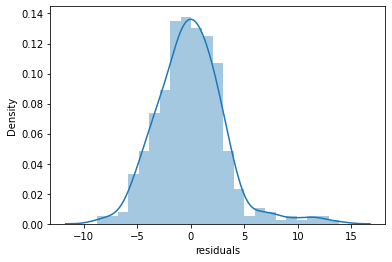

In [ ]:
#sns.displot(autos['residuals'])
sns.distplot(autos['residuals'])

# R2
(Coefficient of determination)

# $r2 = 1 - \frac{\Sigma{(y_i -\hat{y_i})^2}}{\Sigma{(y_i - \bar{y})^2}}$

n = number of data points

y = true values

$\hat{y}$ = predicted values

$\bar{y}$ = mean value


> r2 = 1: Model explains all the variability of the response data around its mean. Precise predictions. \
> r2 = 0:  Model explains none of the variability of the response data around its mean. Predictions are not precise.

In [ ]:
#manually calculated
def r2(true, preds):
  numerator = sum_squared_error(true, preds)
  true_mean = true.mean()
  residual_list = []
  for i in true:
    residual_list.append((i - true_mean)**2)
  denominator = sum(residual_list)
  return 1 - numerator/denominator


#sklearn
r2(autos['mpg'], autos['ypreds'])

metrics.r2_score(autos['mpg'], autos['ypreds'])

0.8332381248141177

Usefulness:
- Easy to interpret: "An R2 of 0.8 means that 80% of the variability in the data are explained by our model, relative to a model with no predictors."
- Measure as close to 1 as possible.
- Does not depend on the scale of y.
- Measurement goes beyond just linear regression.

Drawback:
- Influenced by additional variables (use adj_r2 to penalize additional features).

# Bias and Variance

Question: How do we evaluate error?

The problem with any model can be evaluated as having to do with **high bias**, or **high variance**. These can be referred to as models that **underfit** or **overfit** your observed values. Knowing your model's performance on known and unknown data can help you determine how to improve your model.


Common stragies for dealing with **bias** and **variance**.

- Get more data
- Get a more representative sample of data
- Increase complexity of model
- Decrease complexity of model
- Regularize (Sprint 5)

The goal we typically have in mind with modeling is to **generalize** our estimations well.

### Briefly:  SSE

## $SSE = \sum_{n=1}^n{(y_i - \hat{y_i})^2}$

![image.png](https://github.com/bloominstituteoftechnology/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-bias_variance/images/image.png?raw=1)

### Decomposing error, $E[SSE]$

The expected values of SSE, decomposes into 3 components:

1. **Bias** (aka $bias^2$)
> $(E[\hat{y}] - y)^2$
>
> How much predicted values differ from true values.
1. **Variance**
> $E[\hat{y} - E[\hat{y}]]^2$
>
> How much do predictions differ.
1. **$\sigma^2$** - Irreducible Error

<center><h2> $E[SSE] = \text{bias}^2 + variance + \sigma^2$</h2></center>


> **Irreducible error(s):**
>
> - Error that cannot be reduced by model improvement.
> - Error due to randomness or natural variability in an existing system.



What happens to bias as our predictions get closer to our true value?

What happens to variance as we decrease bias?

### Suppose we want to build a model to best predict "mpg" using "horsepower".

#### Bias

The average difference between our model $\hat{y}$ and the truth $y$.

- Low bias: On average, our predictions are _correct_.
- High bias: As bias increases, our predictions, on average, get more and more _incorrect_.
   - High error
   - Model too simple
   - Diagnosis:  _Underfit_

#### Variance

The amount of variation in our model.

- Low variance: Our predictions consistently hit the same value.
- High variance: Our predictions get more and more spread out.
  - Low error
  - Model too complex
  - Diagnosis:  _Overfit_

## How does bias occur?

![highbias](https://github.com/bloominstituteoftechnology/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-bias_variance/images/highbias.png?raw=1)


- Our model is too simple for our data.
- On average, our model $\hat{y}$ is going to be far from the truth $y$.
- For example, I tried to model a curved relationship with a straight line.
- When we rely on simplifying assumptions that aren’t valid (i.e.linearity), we can run into high bias.
 - Linear regression is an method where we might suffer from high bias.

## How does variance occur?
![variance](https://github.com/bloominstituteoftechnology/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-bias_variance/images/highvariance.png?raw=1)
Basically, more variance points us to believe our model is too complex.

- Our model $\hat{y}$ matches our data too closely.
- May not perform well on data it hasn't seen yet.
- We may not have enough data.
- Our model may "fit" very well to data it's seen, but not generalize well to data it hasn't.

## Tradeoff

Our goal is to minimize the error, testing the accuracy of our model on unseen data, then evaluating if it's overfit or underfit. We are trying to find a balance of bias and variance that allows us to generalize well.

### Increasing Model Complexity
- Bias decreases
- Variance increases (the model is more squiggly)

![tradeoff](https://github.com/bloominstituteoftechnology/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-bias_variance/images/tradeoff.png?raw=1)


In [ ]:
model = ols("mpg ~ weight", data= autos).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          2.97e-103
Time:                        18:38:36   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.0

In [ ]:

i, b1= model.params
model.params

Intercept    46.317364
weight       -0.007677
dtype: float64

In [ ]:
#predicted_values = i + (b1*autos['weight'])

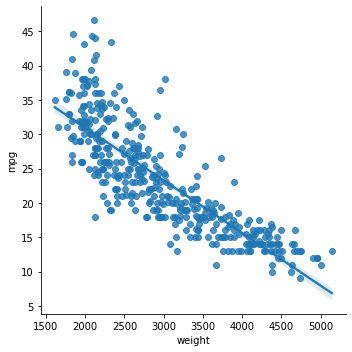

In [ ]:
sns.lmplot(x= 'weight', y = 'mpg', data=autos)

In [ ]:
autos_subset = autos[['mpg', 'weight']].copy()
autos_subset.describe()

,mpg,weight
count,398.000000,398.000000
mean,23.514573,2970.424623
std,7.815984,846.841774
min,9.000000,1613.000000
25%,17.500000,2223.750000
50%,23.000000,2803.500000
75%,29.000000,3608.000000
max,46.600000,5140.000000


In [ ]:
mpg_add= np.random.randint(17, 29, size=(50, 1))
weight_add = np.random.randint(2224, 3608, size= (50, 1))
df_add = pd.DataFrame(np.concatenate([mpg_add, weight_add], axis =1 ))
df_add.columns = ['mpg', 'weight']

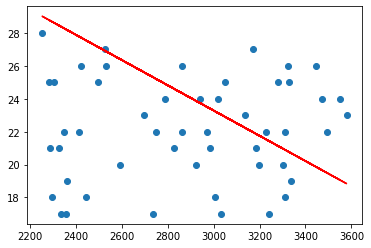

In [ ]:
plt.scatter(df_add['weight'], df_add['mpg'])

plt.plot(df_add['weight'], b1*df_add['weight'] +i, color = 'r')

In [ ]:
sample_data= autos_subset.sample(300)
remainder = autos_subset[~autos_subset.index.isin(sample_data.index)]

autos_subset

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449
...,...,...
393,27.0,2790
394,44.0,2130
395,32.0,2295
396,28.0,2625


In [ ]:
sample_data

,mpg,weight
245,36.1,1800
97,18.0,3121
85,13.0,4100
338,27.2,2490
3,16.0,3433
...,...,...
155,15.0,3158
10,15.0,3563
257,19.4,3210
215,13.0,3755


In [ ]:
remainder

,mpg,weight
2,18.0,3436
5,15.0,4341
15,22.0,2833
24,21.0,2648
27,11.0,4382
...,...,...
380,36.0,2160
381,36.0,2205
383,38.0,1965
386,25.0,2945


In [ ]:
first_model = ols('mpg ~ weight', data= sample_data).fit()
print(model.summary())
i, b = model.params
print(i, b)

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          2.97e-103
Time:                        18:54:55   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.0

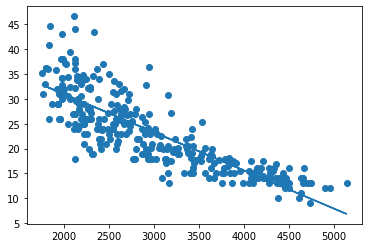

In [ ]:
plt.scatter(sample_data['weight'], sample_data['mpg'])
plt.plot(sample_data['weight'], b*sample_data['weight'] + i)

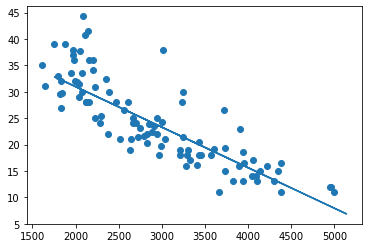

In [ ]:
plt.scatter(remainder['weight'], remainder['mpg'])
plt.plot(sample_data['weight'], b*sample_data['weight'] + i)

In [ ]:
from sklearn.model_selection import train_test_split

X = autos[['weight']].values
y = autos['mpg'].values

lr= LinearRegression()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = .75, random_state= 42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


lr.fit(X_train, y_train)
print("R2 for training data:", lr.score(X_train, y_train))
print("R2 for testing data:", lr.score(X_test, y_test))

(298, 1) (298,) (100, 1) (100,)
R2 for training data: 0.6803632329767397
R2 for testing data: 0.7277224617744513


Resources:

https://online.stat.psu.edu/stat501/lesson/2/2.10

https://online.stat.psu.edu/stat462/node/161/

https://www.analyticsvidhya.com/blog/2020/08/bias-and-variance-tradeoff-machine-learning/

https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/

https://www.codegrepper.com/code-examples/python/add+random+data+to+dataframe